In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.layers import Dense,Input,Dropout
from keras.models import Model,Sequential
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

In [96]:
# Setting random seeds to get consistent results
np.random.seed(0)
tf.random.set_seed(0)

In [97]:
data = pd.read_csv('AirlineTweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [98]:
data = data[['airline_sentiment','text']]

<Axes: >

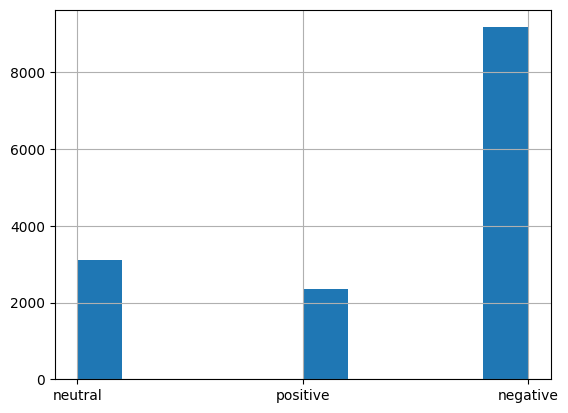

In [99]:
data['airline_sentiment'].hist()

In [100]:
# Ignoring all the neutral tweets
# Good practice to make a copy as new columns will be assigned to the data frame
data = data[data['airline_sentiment']!='neutral'].copy()

In [101]:
target_map = {'positive':1,'negative':0}
data['target'] = data['airline_sentiment'].map(target_map)
data.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [102]:
data_train,data_test = train_test_split(data,random_state=42)

In [103]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(data_train['text'])
X_test = vectorizer.fit_transform(data_test['text'])

In [104]:
X_train

<8655x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 131089 stored elements in Compressed Sparse Row format>

In [105]:
# Data must not be a sparse matrix before passing through tensorflow
X_train = X_train.toarray()
X_test = X_test.toarray()

In [106]:
Y_train = data_train['target']
Y_test = data_test['target']

In [107]:
# Input dimensions to be defined for the model
D = X_train.shape[1] # 1 denotes columns

In [108]:
# Building the model 
# Single layer
i =  Input(shape=(D,))
x = Dense(1)(i)# sigmoid not mentioned as it is accounted for binary cross entropy ahead

model = Model(i,x)

In [109]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 2001      
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [111]:
r = model.fit(
    X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs=40,
    batch_size=128,
)

Epoch 1/40
68/68 [==============================] - 1s 4ms/step - loss: 0.5040 - accuracy: 0.7920 - val_loss: 0.4979 - val_accuracy: 0.8049
Epoch 2/40
68/68 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.7969 - val_loss: 0.4833 - val_accuracy: 0.8049
Epoch 3/40
68/68 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8192 - val_loss: 0.4798 - val_accuracy: 0.8056
Epoch 4/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8449 - val_loss: 0.4779 - val_accuracy: 0.8049
Epoch 5/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.8637 - val_loss: 0.4790 - val_accuracy: 0.8053
Epoch 6/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.8811 - val_loss: 0.4825 - val_accuracy: 0.8056
Epoch 7/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2202 - accuracy: 0.8928 - val_loss: 0.4870 - val_accuracy: 0.8039
Epoch 8/40
68/68 [==

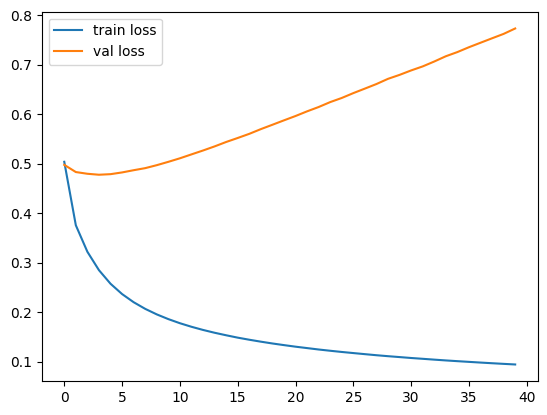

In [112]:
# Plot loss per iteration 
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend();

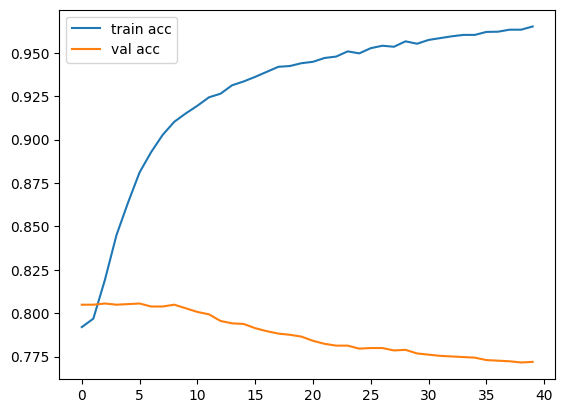

In [113]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend();